# Olist Data Analysis

# Imports and data

In [1]:
# Imports

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Raw data

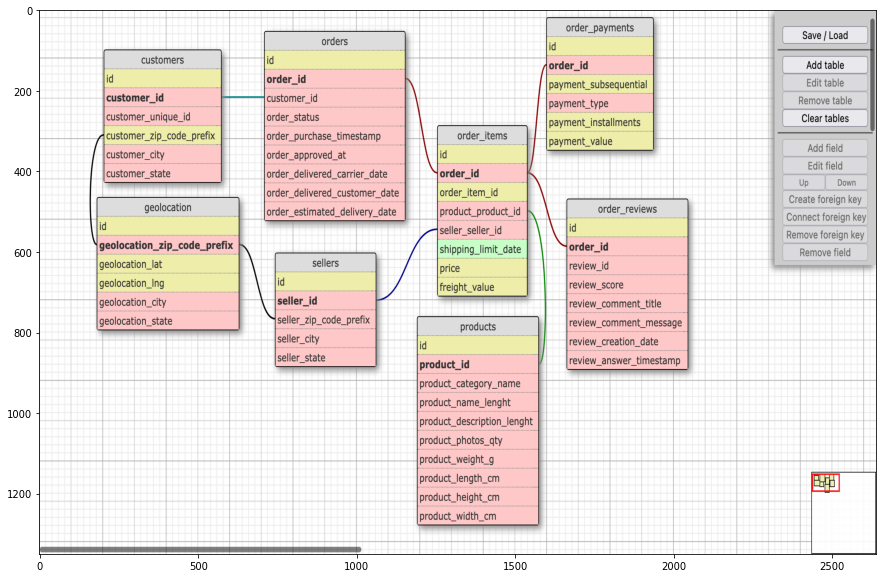

In [2]:
# Entity relationship diagram

relationships = plt.imread('data/csv/Relationship_diagram.png')

plt.figure(figsize= (15,10))
plt.imshow(relationships, aspect= 'auto')

# Customers data

In [3]:
# Load the olist_customers_dataset

customers = pd.read_csv('data/csv/olist_customers_dataset.csv')
customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [4]:
# Get info

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
# Number of uniques

customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

# Order_item data

In [6]:
# Load the olist_order_itmes_dataset

order_item = pd.read_csv('data/csv/olist_order_items_dataset.csv')
order_item.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [7]:
# Get info
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [121]:
# Change shipping_limit_date to datetime
order_item['shipping_limit_date'] = pd.to_datetime(order_item['shipping_limit_date'])
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
 7   total                112650 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 6.9+ MB


In [8]:
# Number of uniques

order_item.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [9]:
# Get min and max order price, mean order price
order_item['price'].max(), order_item['price'].min(), round(order_item['price'].mean(), ndigits=2)

(6735.0, 0.85, 120.65)

In [10]:
# Cost of shipping, Max, Min, Mean
order_item['freight_value'].max(), order_item['freight_value'].min(), round(order_item['freight_value'].mean(), ndigits=2)

(409.68, 0.0, 19.99)

In [11]:
# Amount of orders above and below ave
large_order = order_item['price'] > 120
large_order.value_counts()

False    80513
True     32137
Name: price, dtype: int64

In [12]:
# Create column that contains total amount
order_item['total'] = order_item['price'] + order_item['freight_value']
order_item.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,259.83


In [13]:
# 'Total' amount mean
order_item['total'].mean()

140.6440589436307

In [14]:
# How many different products
order_item['product_id'].value_counts().size

32951

In [119]:
order_item['shipping_limit_date'] = pd.to_datetime(order_item['shipping_limit_date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
 7   total                112650 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 6.9+ MB


# Orders data

In [15]:
# Load the olist_orders_dataset

orders = pd.read_csv('data/csv/olist_orders_dataset.csv')
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [16]:
# Get info
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [131]:
# dates in orders df
orders_dates = orders.loc[:, 'order_purchase_timestamp':]
orders_dates.head(2)

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [17]:
# Number of uniques

orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

# Order_payments data

In [18]:
# Load the olist_order_payment_dataset

order_payments = pd.read_csv('data/csv/olist_order_payments_dataset.csv')
order_payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [19]:
# Get info

order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [20]:
# Number of uniques

order_payments.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

# Reviews data

In [21]:
# Load the olist_reviews_dataset

reviews = pd.read_csv('data/csv/olist_order_reviews_dataset.csv')
reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [22]:
# Get info

reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [23]:
# Number of uniques

reviews.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

In [97]:
# How many of each review
reviews['review_score'].value_counts()

5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_score, dtype: int64

In [101]:
# Average review score
reviews['review_score'].mean()

4.08642062404257

# Products data

In [24]:
# Load the olist_products_dataset

products = pd.read_csv('data/csv/olist_products_dataset.csv')
products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [25]:
# Get info

products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [26]:
# Number of uniques

products.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

# Sellers data

In [27]:
# Load the olist_sellers_dataset

sellers = pd.read_csv('data/csv/olist_sellers_dataset.csv')
sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [28]:
# Get info

sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [29]:
# Number of uniques

sellers.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

# Location data

In [30]:
# Load the olist_geolocation_dataset

location = pd.read_csv('data/csv/olist_geolocation_dataset.csv')
location.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [31]:
# Get info

location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [32]:
# Number of uniques

location.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

In [33]:
# Number of deliveries by city
location['geolocation_city'].value_counts()

sao paulo               135800
rio de janeiro           62151
belo horizonte           27805
são paulo                24918
curitiba                 16593
                         ...  
jacuípe                      1
mar vermelho                 1
quebrangulo                  1
poço das trincheiras         1
poxim                        1
Name: geolocation_city, Length: 8011, dtype: int64

In [34]:
more_than_one_delivery = location['geolocation_city'].value_counts()
more_than_one_delivery = more_than_one_delivery.value_counts() > 1
more_than_one_delivery.size

625

In [35]:
# Number of deliveries by state
location['geolocation_state'].value_counts()

SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     10853
MS     10431
MA      7853
PB      5538
RN      5041
PI      4549
AL      4183
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: geolocation_state, dtype: int64

<AxesSubplot:xlabel='Count', ylabel='geolocation_state'>

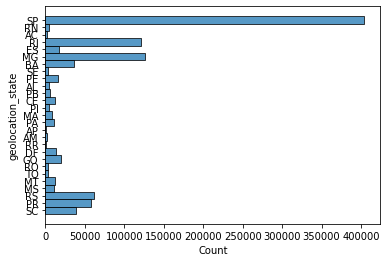

In [36]:
sns.histplot(y= 'geolocation_state', data= location)

# Tranlation data

In [37]:
# Portugese to English
translation = pd.read_csv('data/csv/product_category_name_translation.csv')
translation.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [38]:
translation.shape, translation.nunique(), translation.isna().sum()

((71, 2),
 product_category_name            71
 product_category_name_english    71
 dtype: int64,
 product_category_name            0
 product_category_name_english    0
 dtype: int64)

In [39]:
# Check top 10 most and least common
product_counts = translation['product_category_name_english'].value_counts()
product_counts_top10 = product_counts.head(10)
product_counts_bottom10 = product_counts.tail(10)
product_counts_top10, product_counts_bottom10

(health_beauty                     1
 food                              1
 fashion_sport                     1
 fashion_underwear_beach           1
 construction_tools_safety         1
 books_general_interest            1
 furniture_bedroom                 1
 art                               1
 industry_commerce_and_business    1
 computers                         1
 Name: product_category_name_english, dtype: int64,
 fashion_male_clothing                      1
 kitchen_dining_laundry_garden_furniture    1
 consoles_games                             1
 construction_tools_construction            1
 air_conditioning                           1
 luggage_accessories                        1
 cool_stuff                                 1
 fashion_shoes                              1
 audio                                      1
 security_and_services                      1
 Name: product_category_name_english, dtype: int64)

# Data pre-processing

In [40]:
# Tables with just the relationship keys

order_items_table = order_item[['order_id', 'product_id', 'seller_id']]
review_table = reviews[['order_id', 'review_id']]
orders_table = orders[['order_id', 'customer_id']]

In [41]:
# Merge table keys into one dataframe

merged_table = order_items_table.merge(orders_table, on= 'order_id', how= 'outer').merge(review_table,on= 'order_id', how= 'outer')
merged_table.head(2)

,order_id,product_id,seller_id,customer_id,review_id
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,97ca439bc427b48bc1cd7177abe71365
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,7b07bacd811c4117b742569b04ce3580


In [42]:
# Check for duplicated entries

merged_table.duplicated().sum()

10287

In [43]:
# Merged table with dropped duplicates

merged_table = merged_table.drop_duplicates()
merged_table.head(2)

,order_id,product_id,seller_id,customer_id,review_id
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,97ca439bc427b48bc1cd7177abe71365
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,7b07bacd811c4117b742569b04ce3580


In [44]:
# Get absolute path for data location

csv_path = os.path.join('data', 'csv')
csv_path

'data/csv'

In [45]:
# Create a list of all .csv's in the data/olist folder

names = [name for name in os.listdir(csv_path) if name.endswith('.csv')]
names

['olist_sellers_dataset.csv',
 'product_category_name_translation.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv']

In [46]:
# Remove extra words from file names

table_names =[]

for n in names:
    table_names.append(n.replace('olist_', '').replace('_dataset', '').replace('.csv', ''))

table_names

['sellers',
 'product_category_name_translation',
 'orders',
 'order_items',
 'customers',
 'geolocation',
 'order_payments',
 'order_reviews',
 'products']

In [47]:
# Put table_names and the file path into a dict so it is earier to call

data = {}

for k, v in zip(table_names, names):
    data[k] = pd.read_csv(os.path.join(csv_path, v))
    
data['orders'].head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [48]:
portugese_to_english = products.merge(translation, on= 'product_category_name', how= 'outer')
portugese_to_english.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery


# Data visuals

5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_score, dtype: int64

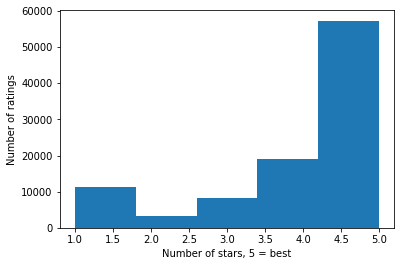

In [49]:
# Ratings by customers

plt.hist(reviews['review_score'], bins= 5)
plt.ylabel('Number of ratings')
plt.xlabel('Number of stars, 5 = best')

reviews['review_score'].value_counts()

SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
PI       1
AC       1
MA       1
AM       1
PA       1
Name: seller_state, dtype: int64

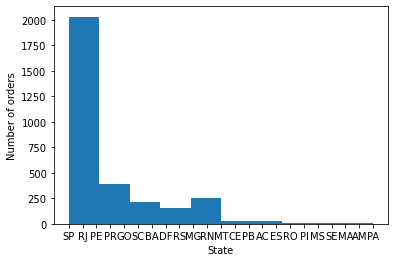

In [50]:
# Number of sellers per state

plt.hist(sellers['seller_state'])
plt.xlabel('State')
plt.ylabel('Number of orders')

sellers['seller_state'].value_counts()

(120.65373901464716, 0.85, 6735.0)

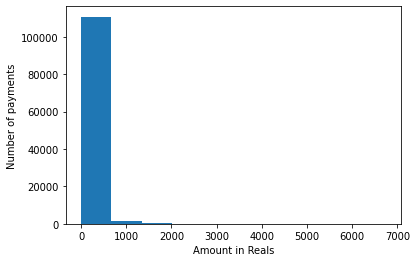

In [51]:
# Number of orders by state. Mean, min and max order amount

plt.hist(order_item['price'])
plt.xlabel('Amount in Reals')
plt.ylabel('Number of payments')

order_item['price'].mean(), order_item['price'].min(), order_item['price'].max()

Text(0, 0.5, 'Status')

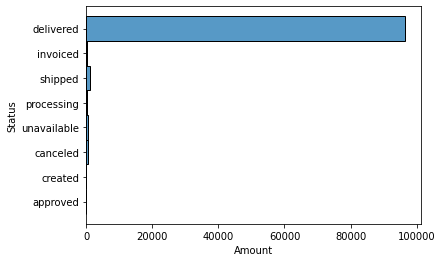

In [96]:
# Deliver status count(s)

sns.histplot(y= orders['order_status'])
plt.xlabel('Amount')
plt.ylabel('Status')

In [53]:
# Merge order, translation, and product df and drop product dimentions
items_products = order_item.merge(products, how= 'left').merge(translation, how= 'left')
items_products = items_products.drop(columns= items_products.loc[:, 'product_name_lenght':'product_width_cm'])
items_products.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04,ferramentas_jardim,garden_tools


In [54]:
# Value counts of each category
items_products['product_category_name_english'].value_counts()

bed_bath_table               11115
health_beauty                 9670
sports_leisure                8641
furniture_decor               8334
computers_accessories         7827
                             ...  
arts_and_craftmanship           24
cds_dvds_musicals               14
la_cuisine                      14
fashion_childrens_clothes        8
security_and_services            2
Name: product_category_name_english, Length: 71, dtype: int64

In [55]:
top_ten = items_products['product_category_name_english'].value_counts()[:10]
top_ten

bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
housewares                6964
watches_gifts             5991
telephony                 4545
garden_tools              4347
auto                      4235
Name: product_category_name_english, dtype: int64

In [81]:
#all_df = orders.merge(order_payments, on= 'order_id').merge(order_item, on= 'order_id').merge(reviews, on= 'order_id').merge(
#    customers, on= 'customer_id').merge(products, on= 'product_id').merge(sellers, on= 'seller_id').merge(location, on= 'geolocation_zip_code_prefix')p


In [113]:
# Combine orders, order_items, order_payments, and review df's then drop the comments for reviews
order_df = orders.merge(order_payments, on= 'order_id', how= 'left').merge(order_item, on= 'order_id', how= 'left').merge(reviews, on= 'order_id', how= 'left')
order_df = order_df.drop(columns= ['review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'])
order_df = order_df.drop_duplicates()
order_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total,review_id,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,...,18.12,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71,a54f0611adc9ed256b57ede6b6eb5114,4.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,...,2.00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71,a54f0611adc9ed256b57ede6b6eb5114,4.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,...,18.59,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71,a54f0611adc9ed256b57ede6b6eb5114,4.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,...,141.46,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,141.46,8d5266042046a06655c8db133d120ba5,4.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,...,179.12,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,credit_card,...,195.00,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,195.00,29bb71b2760d0f876dfa178a76bc4734,4.0
119139,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1.0,credit_card,...,271.01,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,271.01,371579771219f6db2d830d50805977bb,5.0
119140,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1.0,credit_card,...,441.16,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,220.58,8ab6855b9fe9b812cd03a480a25058a1,2.0
119141,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1.0,credit_card,...,441.16,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,220.58,8ab6855b9fe9b812cd03a480a25058a1,2.0


<AxesSubplot:xlabel='review_score', ylabel='total'>

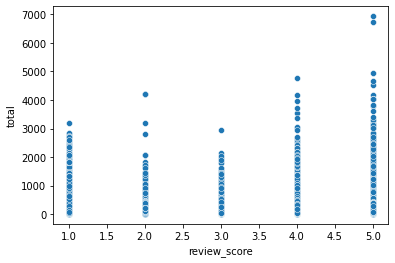

In [114]:
# Scatter plot showing the breakdown of review scores vs total amount spent 
sns.scatterplot(y= 'total', x= 'review_score', data= order_df)

In [115]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   payment_sequential             119140 non-null  float64
 9   payment_type                   119140 non-null  object 
 10  payment_installments           119140 non-null  float64
 11  payment_value                  119140 non-null  float64
 12  order_item_id                 